Agenda:
- Remove features containing missing values
- Handle outliers
- Fix dtypes: categorical: object, quantitative:numerical
- Encode categorical using One hot vector

In [159]:
# importing dependencies
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings("ignore")

import pickle

In [160]:
# Loading the data
train_data = pd.read_csv('../Data/train.csv')
test_data = pd.read_csv('../Data/test.csv')

In [161]:
# joining train and test set for cleaning
all_data = pd.concat([train_data,test_data],axis=0)
all_data.shape
merged_data = all_data

### Removing Features containing missing values
- Missing Values: cols s56,s57,59 contain 100%  missing values, and for cols s54,s55 contain 99% missing values

In [162]:
all_data.s55.isnull().sum()

100760

In [163]:
all_data.drop(['s56','s57','s59','s54','s55'],axis=1,inplace=True)

In [164]:
all_data.shape

(113387, 31)

In [165]:
all_data.head()

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,s53,s58,s69,s70,s71,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,N,1,D,D,B,0,1,,B,x,op: D,b,16.144666,1.989441,2,2.318385,-32.839277,0.017176,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0.0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,M,Y,Y,1,D,D,B,1,1,,B,x,op: D,b,7.144558,0.844866,3,6.197768,-32.576597,0.013857,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1.0
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,M,Y,Y,1,D,D,B,0,1,,B,x,op: D,b,6.923236,1.042018,6,7.824401,-32.510544,0.013943,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0.0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,F,Y,Y,1,D,D,B,0,1,,B,x,op: D,b,5.749840,0.781439,2,8.256767,-32.398679,0.010387,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0.0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,M,N,Y,1,B,D,D,1,l,,B,~1,op: D,d,14.771959,1.248188,3,2.300011,-32.396746,0.016289,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0.0


In [166]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113387 entries, 0 to 85064
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      113387 non-null  object 
 1   gender  113387 non-null  object 
 2   s11     113387 non-null  object 
 3   s12     113387 non-null  object 
 4   s13     113387 non-null  int64  
 5   s16     113387 non-null  object 
 6   s17     113387 non-null  object 
 7   s18     113387 non-null  object 
 8   s48     113387 non-null  int64  
 9   s52     113387 non-null  object 
 10  s53     113387 non-null  object 
 11  s58     113387 non-null  object 
 12  s69     113387 non-null  object 
 13  s70     113387 non-null  object 
 14  s71     113387 non-null  object 
 15  n1      113387 non-null  float64
 16  n2      113387 non-null  float64
 17  n3      113387 non-null  int64  
 18  n4      113387 non-null  float64
 19  n5      113387 non-null  float64
 20  n6      113387 non-null  float64
 21  n7      113

Looks good!

### Removing s53 as its just incremental indexing

In [167]:
all_data.drop('s53',axis=1,inplace=True)

In [168]:
all_data.columns

Index(['id', 'gender', 's11', 's12', 's13', 's16', 's17', 's18', 's48', 's52',
       's58', 's69', 's70', 's71', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7',
       'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'label'],
      dtype='object')

Looks good!

In [169]:
all_data.shape

(113387, 30)

### Handling outliers in n8,n9,n10

<AxesSubplot:xlabel='n8'>

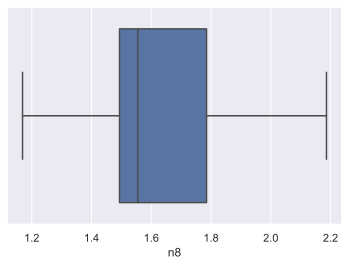

In [170]:
sns.boxplot(all_data['n8'])

<AxesSubplot:xlabel='n9'>

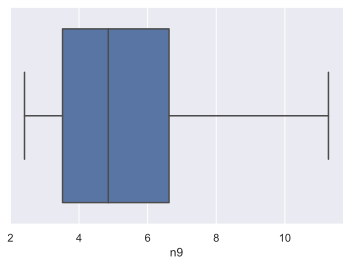

In [171]:
sns.boxplot(all_data['n9'])

<AxesSubplot:xlabel='n10'>

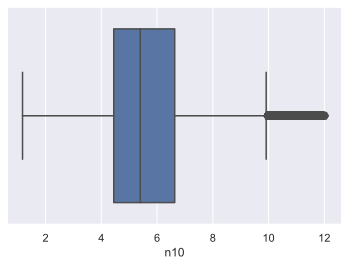

In [172]:
sns.boxplot(all_data['n10'])

In [173]:
((all_data['n10']>10).sum()/all_data.shape[0])*100

12.069284838649933

meaning 12% data falls outside 75th Quartile. Thats a kinda huge portion to be considered as outliers!

In [174]:
all_data['n10'][all_data['n10']>10].describe()

count    13685.000000
mean        11.245177
std          0.376934
min         10.001441
25%         11.111580
50%         11.317351
75%         11.482663
max         12.077567
Name: n10, dtype: float64

<AxesSubplot:>

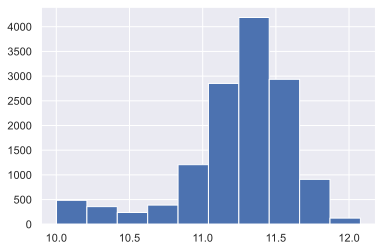

In [175]:
all_data['n10'][all_data['n10']>10].hist()

Conclusion: Lets not do any kind of transformation like: log transformation to deal with outliers! We will come back to this later!

In [176]:
# all_data_non_encoded has all data with only missing values removed
all_data_non_encoded = all_data
all_data_non_encoded.shape

(113387, 30)

### Encoding The Categorical Variables (One Hot Encoded)

In [177]:
# These are encoded as categorical
all_data.dtypes[all_data.dtypes==object].index

Index(['id', 'gender', 's11', 's12', 's16', 's17', 's18', 's52', 's58', 's69',
       's70', 's71'],
      dtype='object')

In [178]:
all_data_one_hot = pd.get_dummies(all_data,columns=['gender', 's11', 's12', 's16', 's17', 's18', \
    's52', 's58', 's69', 's70', 's71'])

In [179]:
all_data_one_hot.head()

,id,s13,s48,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,label,gender_F,gender_M,s11_N,s11_Y,s12_N,s12_Y,s16_A,s16_B,s16_C,s16_D,s17_A,s17_B,s17_C,s17_D,s18_A,s18_B,s18_C,s18_D,s52_0,s52_1,s52_l,s52_o,s58_A,s58_B,s69_0,s69_C`,s69_x,s69_~1,s70_op: A,s70_op: B,s70_op: C,s70_op: D,s71_a,s71_b,s71_c,s71_d
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,1,0,16.144666,1.989441,2,2.318385,-32.839277,0.017176,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0.0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,1,1,7.144558,0.844866,3,6.197768,-32.576597,0.013857,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1.0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,1,0,6.923236,1.042018,6,7.824401,-32.510544,0.013943,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0.0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,1,0,5.749840,0.781439,2,8.256767,-32.398679,0.010387,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0.0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,1,1,14.771959,1.248188,3,2.300011,-32.396746,0.016289,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0.0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1


In [180]:
all_data_one_hot.shape

(113387, 55)

### Label Encoded

In [181]:
from sklearn.preprocessing import LabelEncoder
label_encoded = merged_data
categorical = ['gender', 's11', 's12', 's16', 's17', 's18', 's52', 's58', 's69','s70', 's71']
le = LabelEncoder()
for cols in categorical:
    label_encoded[cols] = le.fit_transform(label_encoded[cols])

In [182]:
label_encoded.head()

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,s58,s69,s70,s71,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,1,1,0,1,3,3,1,0,1,1,2,3,1,16.144666,1.989441,2,2.318385,-32.839277,0.017176,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0.0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,1,1,1,1,3,3,1,1,1,1,2,3,1,7.144558,0.844866,3,6.197768,-32.576597,0.013857,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1.0
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,1,1,1,1,3,3,1,0,1,1,2,3,1,6.923236,1.042018,6,7.824401,-32.510544,0.013943,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0.0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,0,1,1,1,3,3,1,0,1,1,2,3,1,5.749840,0.781439,2,8.256767,-32.398679,0.010387,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0.0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,1,0,1,1,1,3,3,1,2,1,3,3,3,14.771959,1.248188,3,2.300011,-32.396746,0.016289,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0.0


### Normalized / Power Transform (Box-Cox)

In [183]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_label_encoded[truly_numerical] = scaler.fit_transform(label_encoded[truly_numerical])

truly_numerical = ['n1','n2','n4', 'n5', 'n6','n7', 'n8', 'n9', 'n10', 'n11','n14']
scaled_label_encoded = label_encoded

from sklearn.preprocessing import power_transform
scaled_label_encoded[truly_numerical] = power_transform(scaled_label_encoded[truly_numerical],\
    method='yeo-johnson')


In [184]:
scaled_label_encoded.head()

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,s58,s69,s70,s71,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,1,1,0,1,3,3,1,0,1,1,2,3,1,1.141241,0.551897,2,-1.244615,-1.276756e-15,0.199507,0.110361,0.724488,-0.711053,-0.393948,-1.350730,0,0,0.475869,5,0.0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,1,1,1,1,3,3,1,1,1,1,2,3,1,-0.725895,-1.260755,3,0.631563,1.110223e-16,-0.291835,0.260924,-0.645734,0.857498,0.322495,0.114621,0,0,-0.344450,3,1.0
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,1,1,1,1,3,3,1,0,1,1,2,3,1,-0.783598,-0.888190,6,1.183795,4.579670e-16,-0.279014,-0.561128,-0.662165,-0.415116,-1.043819,0.906091,0,0,-0.952886,2,0.0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,0,1,1,1,3,3,1,0,1,1,2,3,1,-1.105319,-1.388074,2,1.317264,1.082467e-15,-0.810034,-1.677379,-0.809525,1.010326,-0.562383,-1.410989,0,0,-1.202626,4,0.0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,1,0,1,1,1,3,3,1,2,1,3,3,3,0.899080,-0.531002,3,-1.256890,1.096345e-15,0.068661,-0.750290,0.136891,-0.681085,-0.958190,-0.532674,0,1,0.831222,1,0.0


### Feature Important Dataset

In [185]:
selected_label_encoded = label_encoded
selected_label_encoded = selected_label_encoded.drop(selected_label_encoded.columns[[
    10,4,8,12,6,17,7,5,1,18,13,11,14,0
]],axis=1)

### Saving DataFrames for future References


In [186]:
train_data.to_pickle('../DataFrames/train_data.pkl')
test_data.to_pickle('../DataFrames/test_data.pkl')
merged_data.to_pickle('../DataFrames/merged_data.pkl')
all_data_non_encoded.to_pickle('../DataFrames/all_data_non_encoded.pkl')
all_data_one_hot.to_pickle('../DataFrames/all_data_one_hot_data.pkl')
label_encoded.to_pickle('../DataFrames/LabelEncoded.pkl')
scaled_label_encoded.to_pickle('../DataFrames/Scaled_label_encoded')